# Decision Boundary Visualization for Iris Classification
This notebook demonstrates how to visualize decision boundaries using Logistic Regression on the Iris dataset, following Aurélien Géron's "Hands-On Machine Learning" Chapter 4.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
# Load and Prepare Iris Dataset
iris = datasets.load_iris()
print("Available keys:", list(iris.keys()))
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Available keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Prepare data: use petal width (feature 3) to predict Iris-virginica
X = iris["data"][:, 3:]  # petal width (only one feature)
y = (iris["target"] == 2).astype(np.int64)  # 1 if Iris-virginica, else 0

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Petal width range:", X.min(), "to", X.max())

X shape: (150, 1)
y shape: (150,)
Petal width range: 0.1 to 2.5


In [4]:
# Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

print("Model trained successfully!")
print("Model coefficients:", log_reg.coef_)
print("Model intercept:", log_reg.intercept_)

Model trained successfully!
Model coefficients: [[4.3330846]]
Model intercept: [-7.1947083]


In [5]:
# Create Decision Boundary Visualization
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# Find decision boundary (where probability = 0.5)
decision_boundary = X_new[np.argmin(np.abs(y_proba[:, 1] - 0.5))]
print(f"Decision boundary at petal width: {decision_boundary[0]:.3f} cm")

Decision boundary at petal width: 1.661 cm


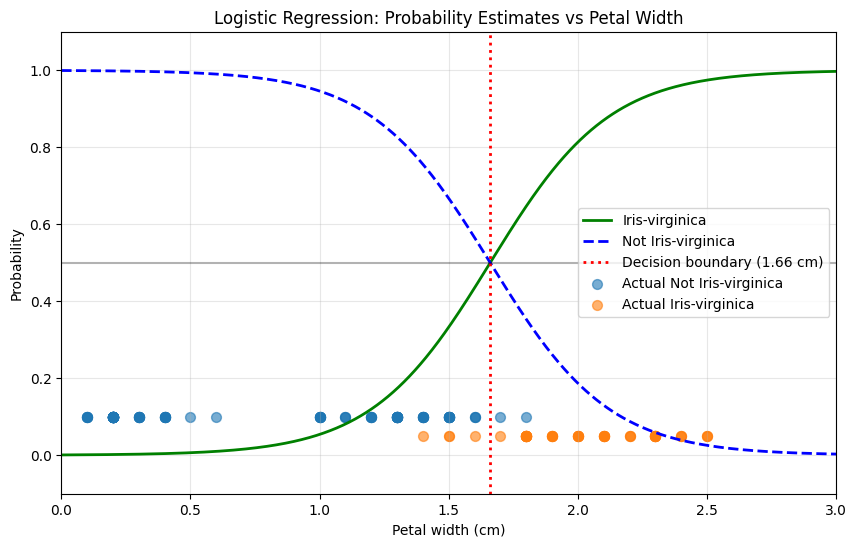

In [6]:
# Plot Probability Estimates vs Petal Width
plt.figure(figsize=(10, 6))

# Plot probability curves
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-virginica")

# Add decision boundary line
plt.axvline(x=decision_boundary, color='r', linestyle=':', linewidth=2, 
           label=f'Decision boundary ({decision_boundary[0]:.2f} cm)')
plt.axhline(y=0.5, color='k', linestyle='-', alpha=0.3)

# Plot actual data points
for i, target_name in enumerate(['Not Iris-virginica', 'Iris-virginica']):
    plt.scatter(X[y == i], [0.1 - i*0.05] * np.sum(y == i), 
               alpha=0.6, s=50, label=f'Actual {target_name}')

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression: Probability Estimates vs Petal Width")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 3)
plt.ylim(-0.1, 1.1)
plt.show()

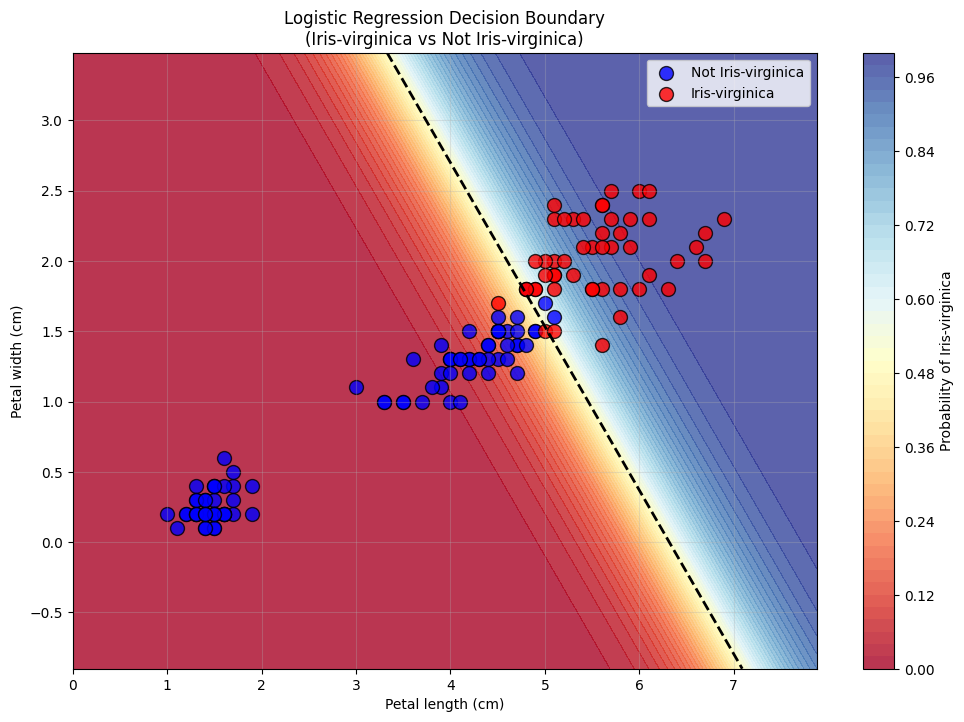

In [7]:
# Visualize Decision Boundary on 2D Feature Space
# Using petal length and petal width for better visualization
X_2d = iris["data"][:, 2:4]  # petal length and petal width
y_2d = (iris["target"] == 2).astype(np.int64)

# Train model on 2D data
log_reg_2d = LogisticRegression(random_state=42)
log_reg_2d.fit(X_2d, y_2d)

# Create a mesh to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get probability estimates for the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = log_reg_2d.predict_proba(mesh_points)[:, 1]
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot decision boundary and probability regions
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.colorbar(label='Probability of Iris-virginica')

# Plot decision boundary line (probability = 0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)

# Plot the actual data points
colors = ['blue', 'red']
labels = ['Not Iris-virginica', 'Iris-virginica']
for i, color, label in zip([0, 1], colors, labels):
    plt.scatter(X_2d[y_2d == i, 0], X_2d[y_2d == i, 1], 
               c=color, marker='o', s=100, alpha=0.8, 
               edgecolors='black', label=label)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Logistic Regression Decision Boundary\n(Iris-virginica vs Not Iris-virginica)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Key Observations

1. **Decision Boundary**: The decision boundary occurs where the probability equals 0.5
2. **Sigmoid Shape**: The probability curve shows the characteristic S-shaped (sigmoid) curve of logistic regression
3. **Feature Importance**: Petal width is a strong predictor for distinguishing Iris-virginica from other species
4. **Linear Separation**: The 2D visualization shows how logistic regression creates a linear decision boundary in feature space

This follows the approach described in Aurélien Géron's Chapter 4, demonstrating how logistic regression creates smooth probability estimates and clear decision boundaries.